# Libraries


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from frameExtraction import FrameExtraction
from heatmapGeneration import HeatmapGeneration
from masks import Mask
from PIL import Image
import torch

In [2]:
def show_image_from_path(path):
    plt.imshow(np.asarray(Image.open(path)))
    plt.tight_layout()
    plt.axis("off")
    plt.show()

# Paths


In [3]:
videos_csv = "../EchoNet-Dynamic/VolumeTracings.csv"
images_csv = "../EchoNet-Dynamic/images_info.csv"
images_path = "../EchoNet-Dynamic/data/images"
videos_path = "../EchoNet-Dynamic/videos"
masks_path = "../EchoNet-Dynamic/data/masks"
heatmaps_path = "../EchoNet-Dynamic/data/heatmaps"

# Save Frames


In [4]:
video_info = pd.read_csv(videos_csv)
video_info.head()

,FileName,X1,Y1,X2,Y2,Frame
0,0X100009310A3BD7FC.avi,51.260417,15.348958,64.932292,69.125000,46
1,0X100009310A3BD7FC.avi,50.037611,17.167841,53.367222,16.321330,46
2,0X100009310A3BD7FC.avi,49.157378,20.407629,57.090549,18.390722,46
3,0X100009310A3BD7FC.avi,48.538173,23.581055,59.997339,20.667707,46
4,0X100009310A3BD7FC.avi,47.918968,26.754480,62.904129,22.944693,46


The FrameExtraction class simply extracts specific frames based on 'VolumeTracings.cvs' and save a .csv with all the landmarks or an specific number of them, it depends of 'num_landmarks' param.


In [5]:
extraction = FrameExtraction(video_info=video_info)
extraction.save_images(num_landmarks=5)

¡Straction Done!
Path images:  ../EchoNet-Dynamic/data/images/
Path df:  ../EchoNet-Dynamic/images_info.csv


In [6]:
frame_info = pd.read_csv(images_csv)
frame_info.head()

,File,X,Y
0,0X1A05DFFFCAFB253B_48.jpeg,54,14
1,0X1A05DFFFCAFB253B_48.jpeg,79,71
2,0X1A05DFFFCAFB253B_48.jpeg,47,45
3,0X1A05DFFFCAFB253B_48.jpeg,66,75
4,0X1A05DFFFCAFB253B_48.jpeg,76,40


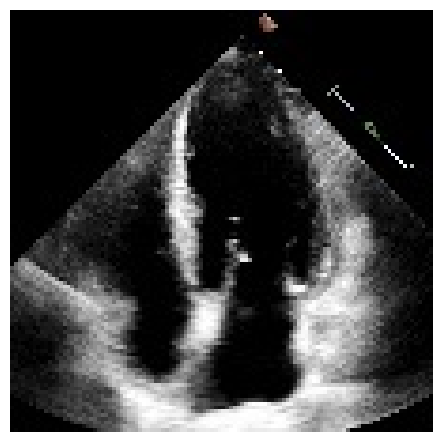

In [7]:
sample_image = f"{images_path}/{os.listdir(images_path)[0]}"
show_image_from_path(sample_image)

# Get Masks


In [8]:
files = os.listdir(images_path)

mask = Mask(
    file_info=frame_info,
    amount_of_frames=2,
    images_files_array=files,
    files_path=images_path,
)

# mask.generate_masks(action="show")
mask.generate_masks(action="save")

IMAGE SAVING DONE!


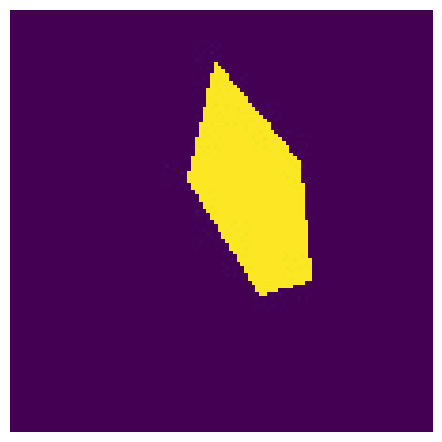

In [9]:
sample_mask = f"{masks_path}/{os.listdir(masks_path)[0]}"
show_image_from_path(sample_mask)

# Heatmap Generation


In [10]:
heatmap = HeatmapGeneration(frame_info=frame_info)
heatmap.heatmap(distribution="Gaussian")

In [11]:
heatmap.heatmap(distribution="Euclidean")

In [12]:
def show_n_channel_image_tensor(tensor):
    complete_image = tensor[0]
    for channel in tensor[1:]:
        complete_image += channel
    plt.imshow(complete_image)
    plt.tight_layout()
    plt.axis("off")
    plt.show()

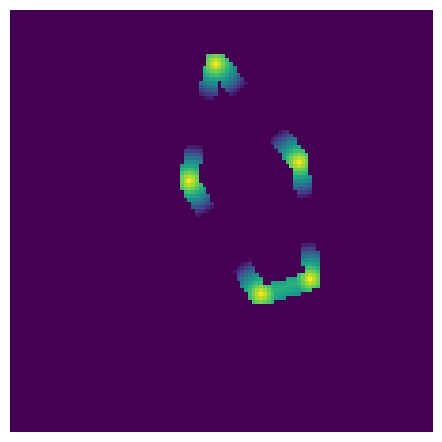

In [13]:
sample_euclidean_path = (
    f"{heatmaps_path}/euclidean/{os.listdir(f'{heatmaps_path}/euclidean')[0]}"
)
sample_euclidean_heatmap = torch.load(sample_euclidean_path)
show_n_channel_image_tensor(sample_euclidean_heatmap)

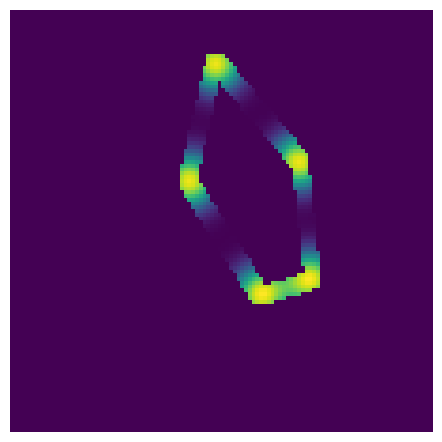

In [20]:
sample_gaussian_path = (
    f"{heatmaps_path}/gaussian/{os.listdir(f'{heatmaps_path}/gaussian')[0]}"
)
sample_gaussian_heatmap = torch.load(sample_gaussian_path)
show_n_channel_image_tensor(sample_gaussian_heatmap)